In [1]:
import pandas as pd
import numpy as np


In [2]:
#!pip install pycaret

In [3]:
!pip install --use-deprecated=legacy-resolver pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:

data = data =pd.read_csv('/content/drive/MyDrive/phd/final.csv')

In [5]:
data.head()

,Unnamed: 0,ID CODE,Sex,Age,Baseline visit,num. visit,Dressing type_x,Ulcer_stage,"Cured: 1, no cured: 2",infected,...,porc_friccion,porc_infec,Loss to follow up,Location,Nurse costs,Dressing costs,Material costs,Secondary costs,Total costs,Dressing type_y
0,0,270009,Female,86,2015-09-11,2.0,Hydrocellular,1,2,2,...,NaN,NaN,2,Trochanter,5.000000,46.53,3.368,0.00,54.898000,Hydrocellular
1,1,470003,Female,92,2014-09-19,2.0,Hydrocellular,2,2,2,...,NaN,NaN,1,Trochanter,3.645833,40.92,2.004,0.00,46.569833,Hydrocellular
2,2,30006,Female,88,2014-06-03,2.0,Hydrocolloid,2,2,1,...,NaN,NaN,2,Trochanter,18.750000,57.40,1.682,0.00,77.832000,Hydrocolloid
3,3,100005,Female,91,2014-03-11,3.0,Hydrocolloid,1,2,2,...,1.0,1.0,2,Trochanter,10.750000,45.10,2.680,0.00,58.530000,Hydrocolloid
4,4,100011,Female,86,2015-09-28,4.0,Hydrocolloid,1,2,2,...,1.0,0.0,2,Trochanter,19.250000,69.70,7.808,0.07,96.828000,Hydrocolloid


In [6]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
# check installed version
import pycaret
pycaret.__version__

'3.0.0'

In [8]:
# import pycaret clustering and init setup
from pycaret.clustering import *
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(169, 25)"
2,Transformed data shape,"(169, 174)"
3,Ordinal features,3
4,Numeric features,19
5,Categorical features,6
6,Rows with missing values,30.2%
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [9]:
# import ClusteringExperiment and init the class
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()

In [10]:
# check the type of exp
type(exp)

pycaret.clustering.oop.ClusteringExperiment

In [11]:
# init setup on exp
exp.setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(169, 25)"
2,Transformed data shape,"(169, 174)"
3,Ordinal features,3
4,Numeric features,19
5,Categorical features,6
6,Rows with missing values,30.2%
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [12]:
# train kmeans model
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7285,1693.3907,0.3592,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [13]:
# to check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [14]:
# train kmeans model
dbscan = create_model('dbscan')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [15]:
# train kmeans model
meanshift = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6309,1205.2161,0.5382,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# train kmeans model
dbscan = create_model('meanshift')

In [16]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,ID CODE,Sex,Age,Baseline visit,num. visit,Dressing type_x,Ulcer_stage,"Cured: 1, no cured: 2",infected,Postural changes,...,porc_infec,Loss to follow up,Location,Nurse costs,Dressing costs,Material costs,Secondary costs,Total costs,Dressing type_y,Cluster
0,270009,Female,86,2015-09-11,2.0,Hydrocellular,1,2,2,0,...,NaN,2,Trochanter,5.000000,46.529999,3.36800,0.00,54.897999,Hydrocellular,Cluster 0
1,470003,Female,92,2014-09-19,2.0,Hydrocellular,2,2,2,0,...,NaN,1,Trochanter,3.645833,40.919998,2.00400,0.00,46.569832,Hydrocellular,Cluster 2
2,30006,Female,88,2014-06-03,2.0,Hydrocolloid,2,2,1,0,...,NaN,2,Trochanter,18.750000,57.400002,1.68200,0.00,77.832001,Hydrocolloid,Cluster 1
3,100005,Female,91,2014-03-11,3.0,Hydrocolloid,1,2,2,1,...,1.0,2,Trochanter,10.750000,45.099998,2.68000,0.00,58.529999,Hydrocolloid,Cluster 1
4,100011,Female,86,2015-09-28,4.0,Hydrocolloid,1,2,2,2,...,0.0,2,Trochanter,19.250000,69.699997,7.80800,0.07,96.828003,Hydrocolloid,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,230010,Male,68,2015-03-20,3.0,Hydrocolloid,1,2,2,1,...,1.0,2,Gluteus,11.500000,45.099998,8.89872,3.24,68.738724,Hydrocolloid,Cluster 0
165,270001,Male,84,2011-07-04,3.0,Hydrocolloid,1,2,2,1,...,1.0,2,Gluteus,16.250000,8.200000,10.22800,0.00,34.678001,Hydrocolloid,Cluster 0
166,400001,Male,71,2014-07-22,3.0,Hydrocolloid,1,2,2,1,...,0.0,2,Gluteus,12.500000,45.099998,3.31600,0.00,60.916000,Hydrocolloid,Cluster 3
167,400007,Male,71,2015-10-09,2.0,Hydrocolloid,1,2,2,0,...,NaN,2,Gluteus,12.500000,57.400002,3.27200,0.00,73.171997,Hydrocolloid,Cluster 3


In [17]:
# plot pca cluster plot 
plot_model(kmeans, plot = 'cluster')

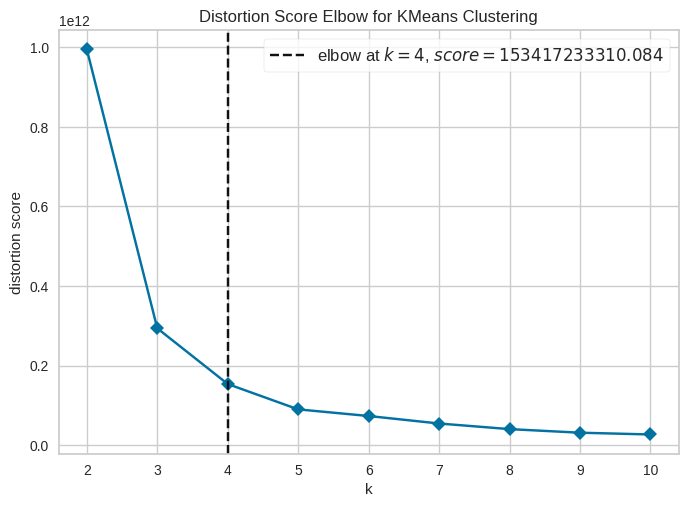

In [18]:
# plot elbow
plot_model(kmeans, plot = 'elbow')

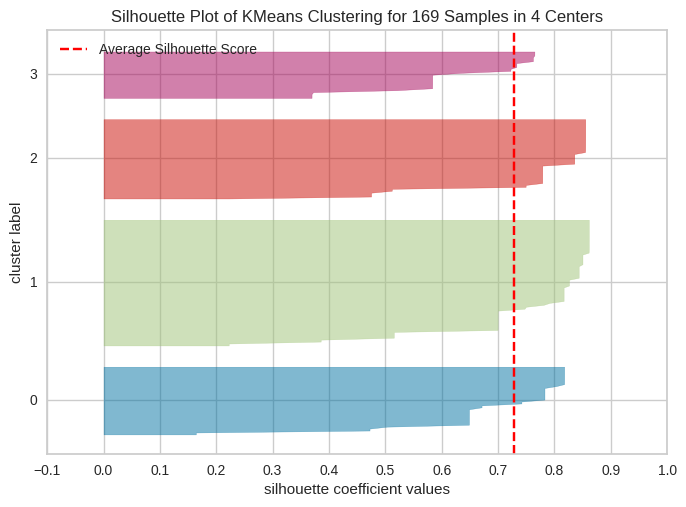

In [19]:
# plot silhouette
plot_model(kmeans, plot = 'silhouette')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

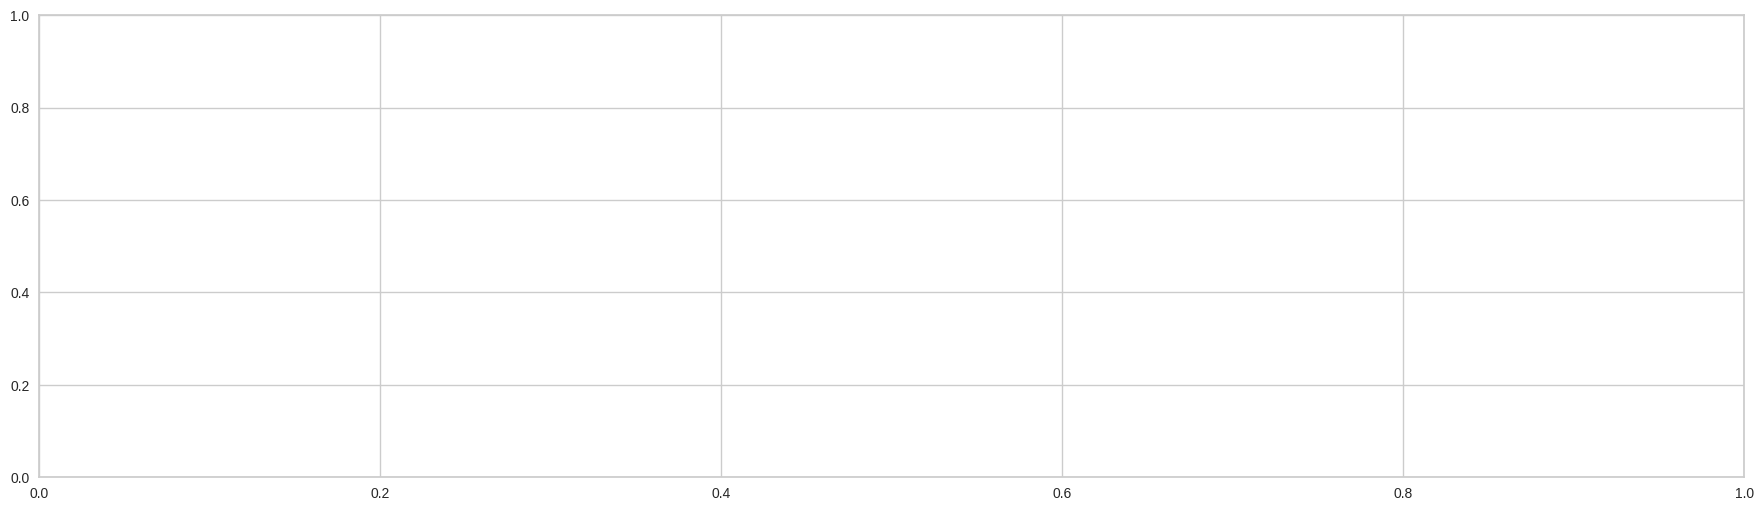

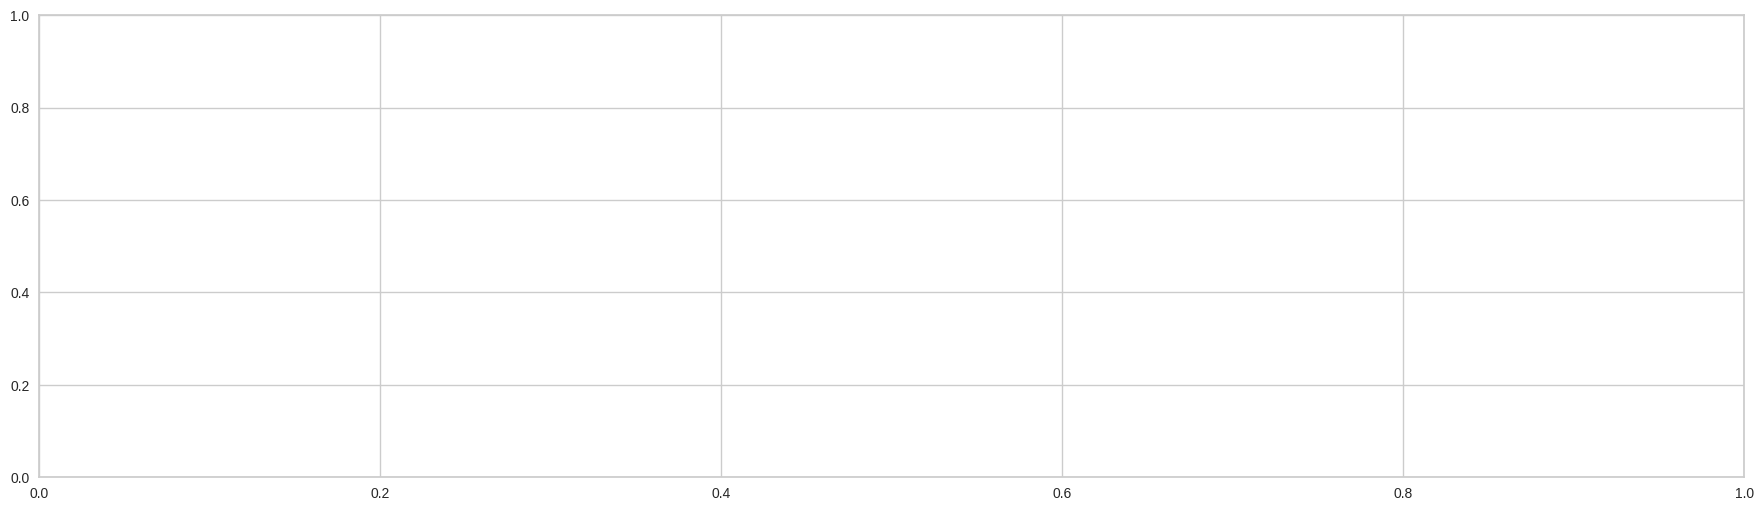

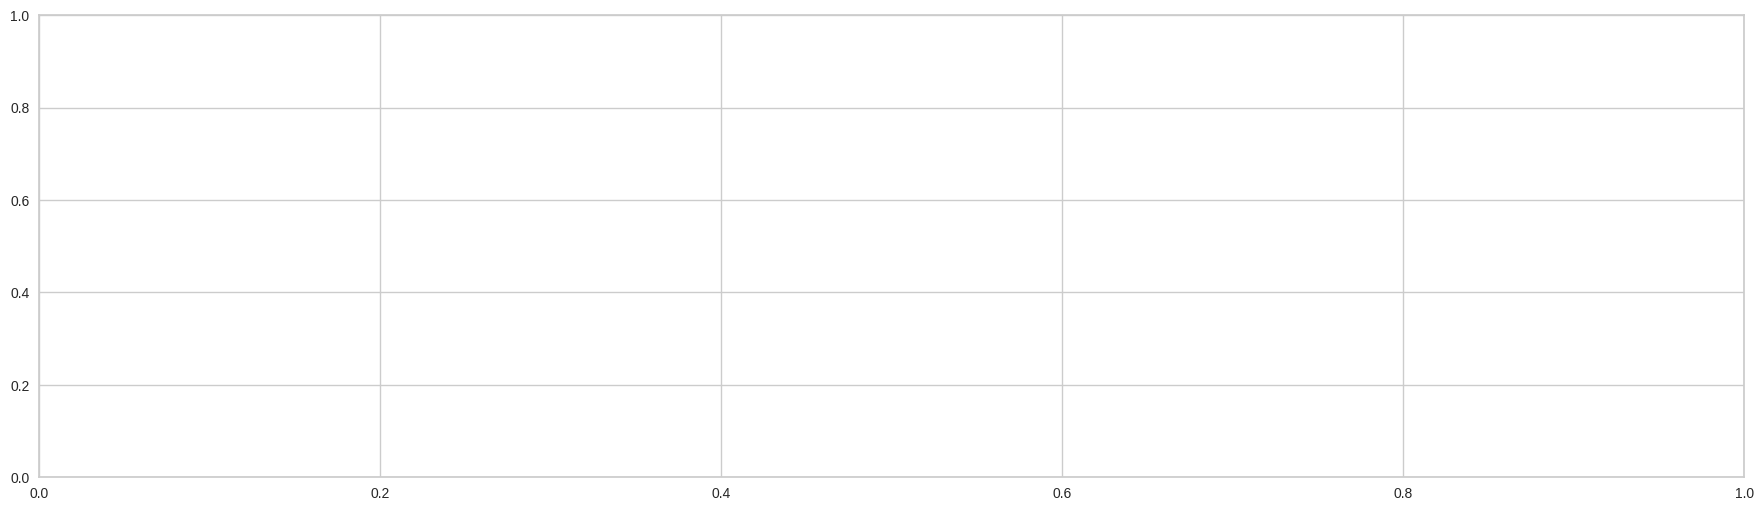

In [20]:
evaluate_model(kmeans)